# Unicorn Companies Financial Analysis: Identifying Investment Opportunities

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPARATION AND INITIAL SETUP

In [2]:
df=pd.read_csv("D:\\AKASH\\python\\unicorn\\Unicorn_Companies.csv")  
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
df.shape    #Number of rows and columns

(1074, 10)

In [4]:
df.info()      #to know the columns and  data type(valuation should be integer , data joined coln in date datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


# DATA CLEANING

In [5]:
df['Date Joined']=pd.to_datetime(df['Date Joined'])  #converted into datetime format

C:\Users\akash vishwakarma\AppData\Local\Temp\ipykernel_20472\413858440.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined']=pd.to_datetime(df['Date Joined'])  #converted into datetime format


In [6]:
#FUNDING HAS UNKNOWN VALUES SO WE WILL PUT NUll values in that because we want to convert that coln in float data type4
df['Funding']=df['Funding'].replace('Unknown',np.nan)

In [7]:
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [8]:
df['Valuation'] = df['Valuation'].replace({'\$':'','B':'e9'},regex=True).astype(float)
df['Funding'] = df['Funding'].replace({'\$':'','B':'e9','M':'e6'}, regex=True).astype(float)

#converted valuation and Funding into float datatype
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                    float64
Select Investors            object
dtype: object

In [9]:
df.isnull().sum()  #to find null values in a column

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

In [10]:
#there are many way to deal with Null values in city . but i will go wiht naming the null city with unknown cities

In [11]:
df['City']=df['City'].fillna('Unknown')
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                 0
Country/Region       0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

In [12]:
df['Select Investors']=df['Select Investors'].fillna('Unknown')

In [13]:
df.isnull().sum() #we are done with dealing Null values

Company              0
Valuation            0
Date Joined          0
Industry             0
City                 0
Country/Region       0
Continent            0
Year Founded         0
Funding             12
Select Investors     0
dtype: int64

In [14]:
df['City'].unique()
df['Industry'].unique()#text formatting are fine

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

In [15]:
#find duplicated and delete if have any

In [16]:
df.duplicated().sum()  #no duplicated found  # if any df=drop_duplicates()

0

In [17]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [18]:
#want to extract year from date for analysis purpose
df['Year Joined']=df['Date Joined'].dt.year

In [19]:
df['Year Joined']

0       2017
1       2012
2       2018
3       2014
4       2011
        ... 
1069    2017
1070    2017
1071    2021
1072    2021
1073    2020
Name: Year Joined, Length: 1074, dtype: int32

In [20]:
#convert valuation number in billion units
df['valuation in billions']=df['Valuation']/1e9

# Meaningful Exploratory Data Analysis (EDA)
The EDA should aim to answer specific questions that align with the business context and help the investor learn more about profitable companies. We'll be structuring our EDA around insightful questions

# 1)What are the most common industries for unicorn companies?

In [22]:
#Identify the top industries that frequently produce unicorns , their average valuations.

In [23]:
industry_wise_unicorn=df['Industry'].value_counts().reset_index()
industry_wise_unicorn

,Industry,count
0,Fintech,224
1,Internet software & services,205
2,E-commerce & direct-to-consumer,111
3,Artificial intelligence,84
4,Health,74
5,Other,58
6,"Supply chain, logistics, & delivery",57
7,Cybersecurity,50
8,Data management & analytics,41
9,Mobile & telecommunications,38


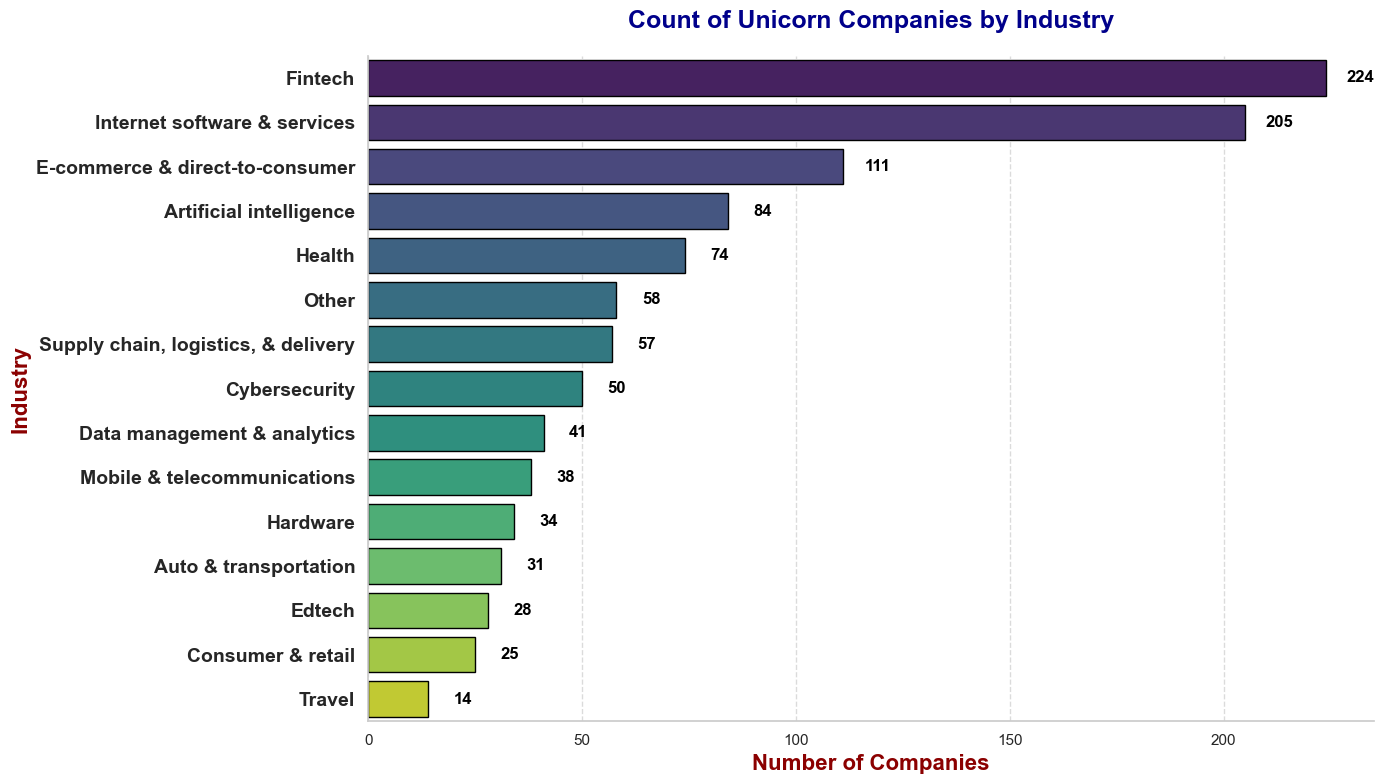

In [126]:
sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))  

bar_plot = sns.barplot(
    x='count',
    y='Industry',
    data=industry_wise_unicorn,
    palette='viridis',  
    edgecolor='black' 
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',  
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='center', va='center',  
                      xytext=(25, 0),
                      textcoords='offset points',
                      fontsize=12, color='black', weight='bold')  

plt.title('Count of Unicorn Companies by Industry', fontsize=18, weight='bold', color='darkblue', pad=20)
plt.xlabel('Number of Companies', fontsize=16, weight='bold', color='darkred')
plt.ylabel('Industry', fontsize=16, weight='bold', color='darkred')

plt.yticks(fontsize=14, weight='bold', rotation=0, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()
plt.tight_layout()

plt.show()


INSIGHTS:
This graph will show the top industries for unicorn companies . 
The investor can use this information to focus on high-potential sectors.

# 2)Explore the top 10 countries by total unicorn valuation, excluding the major players (United States, China, India, and United Kingdom).

In [107]:
countrywise_total_valuation=df.groupby(df['Country/Region'])['valuation in billions'].sum().reset_index()
top10_countries=countrywise_total_valuation[~countrywise_total_valuation['Country/Region'].isin(['United States','China','India','United Kingdom'])]
top10_filtered=top10_countries.sort_values(by='valuation in billions',ascending=False).head(10)
top10_filtered

,Country/Region,valuation in billions
17,Germany,72.0
38,Sweden,63.0
1,Australia,56.0
16,France,55.0
7,Canada,49.0
36,South Korea,41.0
22,Israel,39.0
6,Brazil,37.0
3,Bahamas,32.0
20,Indonesia,28.0


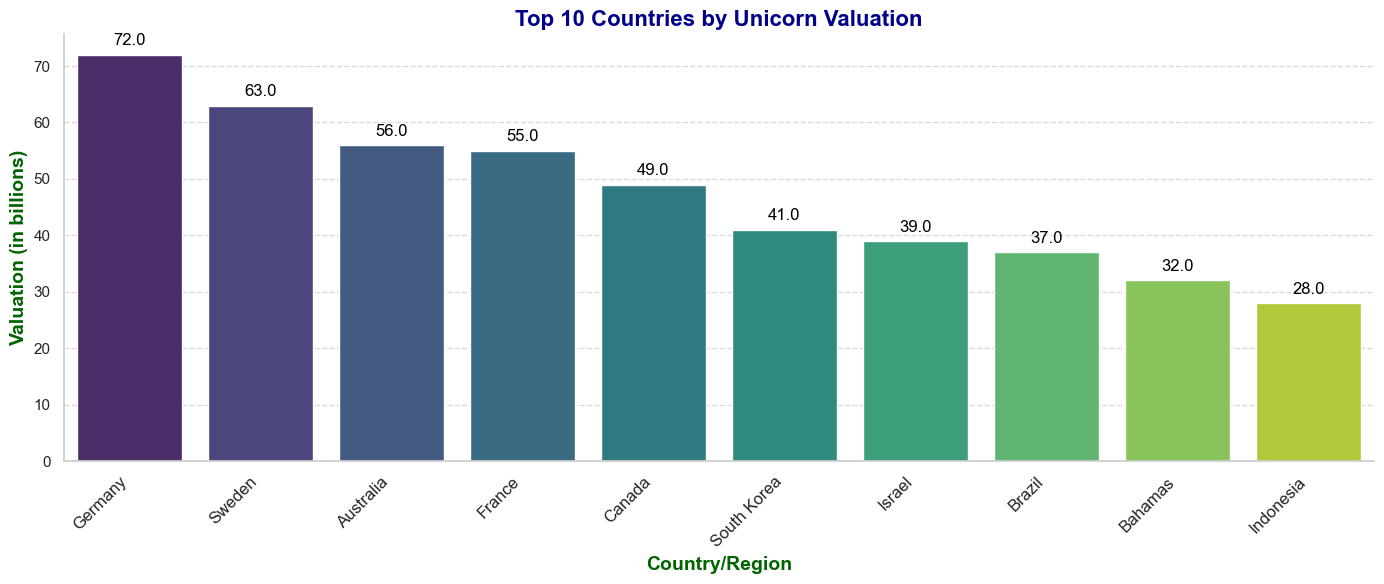

In [127]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x='Country/Region', y='valuation in billions', data=top10_filtered, palette='viridis')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points',
                      fontsize=12, color='black')

plt.title("Top 10 Countries by Unicorn Valuation", fontsize=16, weight='bold', color='darkblue')
plt.xlabel("Country/Region", fontsize=14, weight='bold', color='darkgreen')
plt.ylabel("Valuation (in billions)", fontsize=14, weight='bold', color='darkgreen')

plt.xticks(rotation=45, ha='right', fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Insight:
This chart will help us focus on smaller, emerging markets where unicorn companies are beginning to grow. These regions may be prime candidates for future investments.

# 3)Identify cities that have a high  mean valuations.

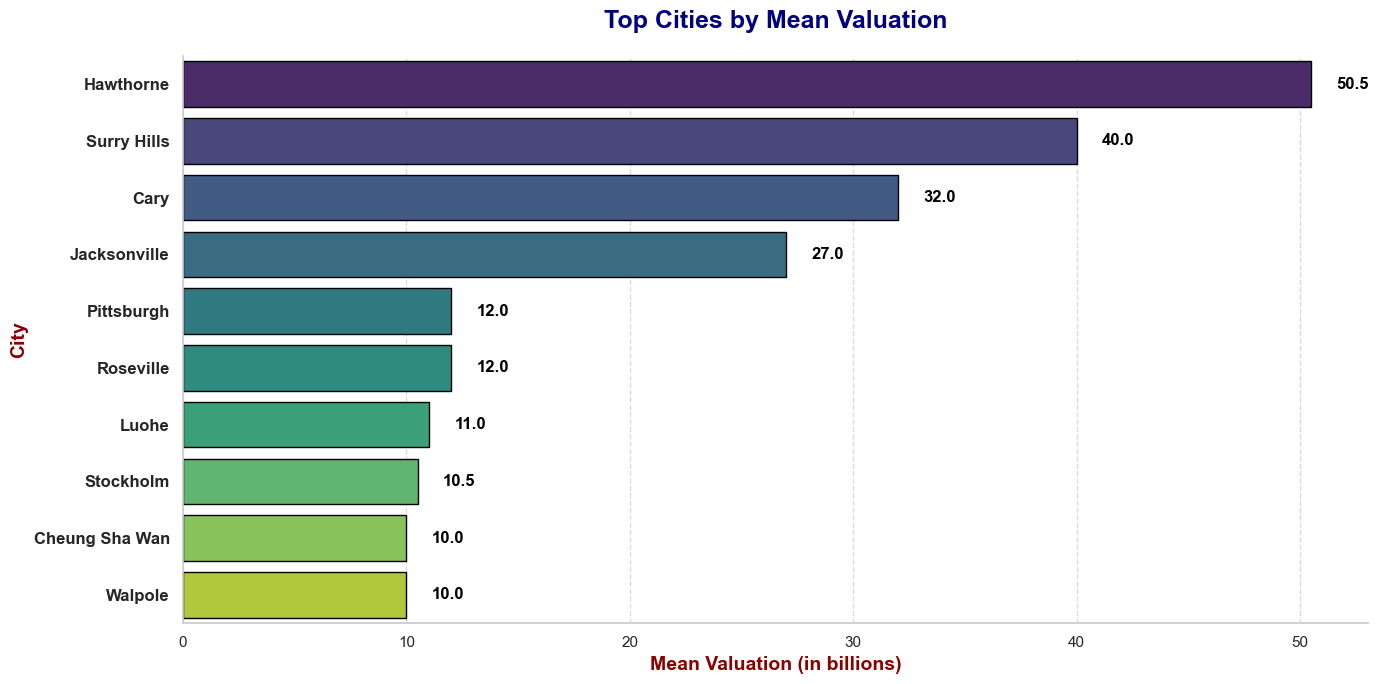

In [128]:
city_mean_valuation = df.groupby('City')['valuation in billions'].mean().reset_index()


top_cities = city_mean_valuation.sort_values(by='valuation in billions', ascending=False).head(10)

sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))  

bar_plot = sns.barplot(
    x='valuation in billions',
    y='City',
    data=top_cities,
    palette='viridis', 
    edgecolor='black'    
)


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():,.1f}',  
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center',
                      xytext=(30, 0),  
                      textcoords='offset points',
                      fontsize=12, color='black', weight='bold')

plt.title("Top Cities by Mean Valuation", fontsize=18, weight='bold', color='navy', pad=20)
plt.xlabel("Mean Valuation (in billions)", fontsize=14, weight='bold', color='darkred')
plt.ylabel("City", fontsize=14, weight='bold', color='darkred')
plt.yticks(fontsize=12, weight='bold', rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

INSIGHTS:
Understanding the top cities for unicorns can help the investor spot geographical patterns and identify cities with emerging startup ecosystems.

# 4)How long does it typically take for companies in different industries to achieve unicorn status

In [28]:
df['Years taken']=df['Year Joined']-df['Year Founded']

In [29]:
avg_years_taken_unicorn=df.groupby(df['Industry'])['Years taken'].mean().round(2).reset_index()
avg_years_taken_unicorn

,Industry,Years taken
0,Artificial intelligence,5.89
1,Auto & transportation,5.03
2,Consumer & retail,8.08
3,Cybersecurity,6.80
4,Data management & analytics,8.07
5,E-commerce & direct-to-consumer,6.43
6,Edtech,7.71
7,Fintech,6.54
8,Hardware,5.94
9,Health,8.19


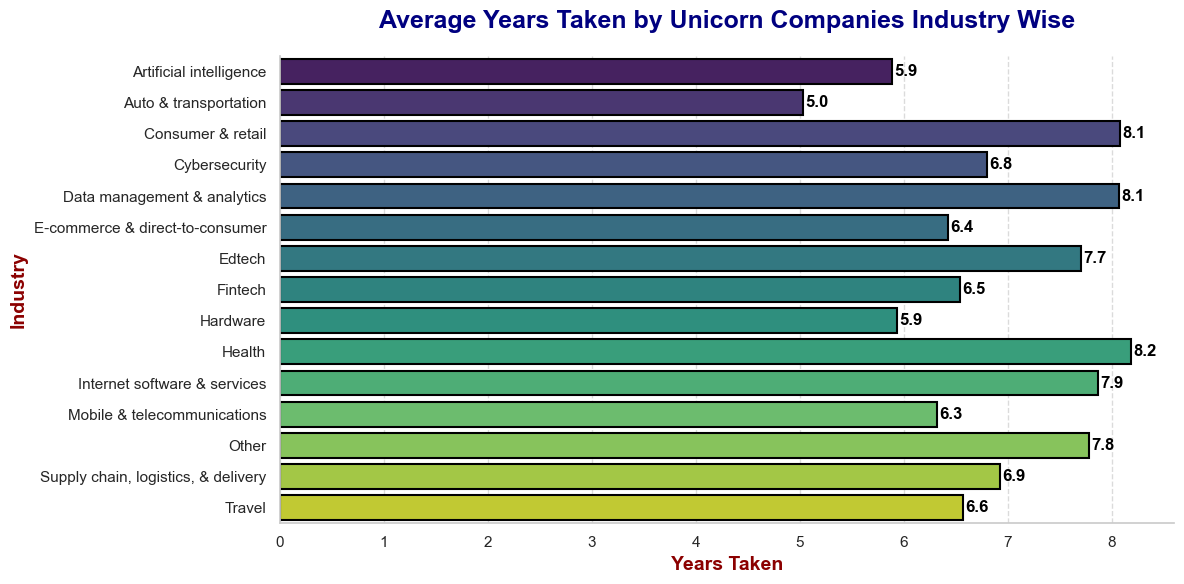

In [129]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    x='Years taken',
    y='Industry',
    data=avg_years_taken_unicorn,
    palette='viridis',
    edgecolor='black',
    linewidth=1.5
)

for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_width():.1f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='center', va='center',
        fontsize=12, color='black', weight='bold',
        xytext=(10, 0),
        textcoords='offset points'
    )

plt.title("Average Years Taken by Unicorn Companies Industry Wise", fontsize=18, weight='bold', color='navy', pad=20)
plt.xlabel("Years Taken", fontsize=14, weight='bold', color='darkred')
plt.ylabel("Industry", fontsize=14, weight='bold', color='darkred')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()

plt.show()

INSIGHTS:Specific sectors which take minimum years to become unicorn

# 5)Analyze if companies founded more recently are reaching unicorn status faster than those founded in earlier years.

In [31]:
avg_years_founded_joined=df.groupby(df['Year Founded'])['Years taken'].mean().round(2).reset_index()
avg_years_founded_joined

,Year Founded,Years taken
0,1919,98.00
1,1979,37.00
2,1984,37.00
3,1990,27.00
4,1991,27.00
5,1992,25.00
6,1993,28.00
7,1994,21.50
8,1995,21.50
9,1996,25.00


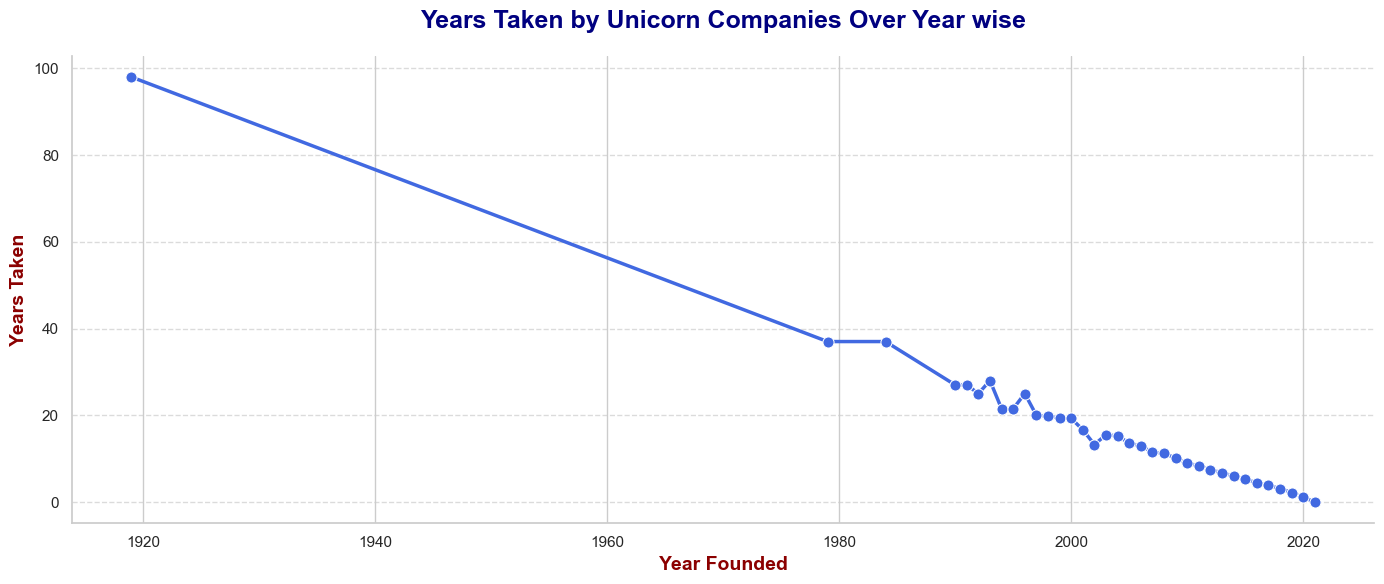

In [130]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))

line_plot = sns.lineplot(
    x='Year Founded',
    y='Years taken',
    data=avg_years_founded_joined,
    marker='o',
    color='royalblue',
    linewidth=2.5,
    markersize=8,
    linestyle='-',
)

plt.title("Years Taken by Unicorn Companies Over Year wise", fontsize=18, weight='bold', color='navy', pad=20)
plt.xlabel("Year Founded", fontsize=14, weight='bold', color='darkred')
plt.ylabel("Years Taken", fontsize=14, weight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()

plt.show()

INSIGHTS:Companies which are recentlly founded are tend to become unicorn more

# 6)Top 10 most valuable companies?

In [33]:
top10_company=df[['Company','valuation in billions']].sort_values(by='valuation in billions',ascending=False).head(10)
top10_company

,Company,valuation in billions
0,Bytedance,180.0
1,SpaceX,100.0
2,SHEIN,100.0
3,Stripe,95.0
4,Klarna,46.0
5,Canva,40.0
6,Checkout.com,40.0
7,Instacart,39.0
8,JUUL Labs,38.0
9,Databricks,38.0


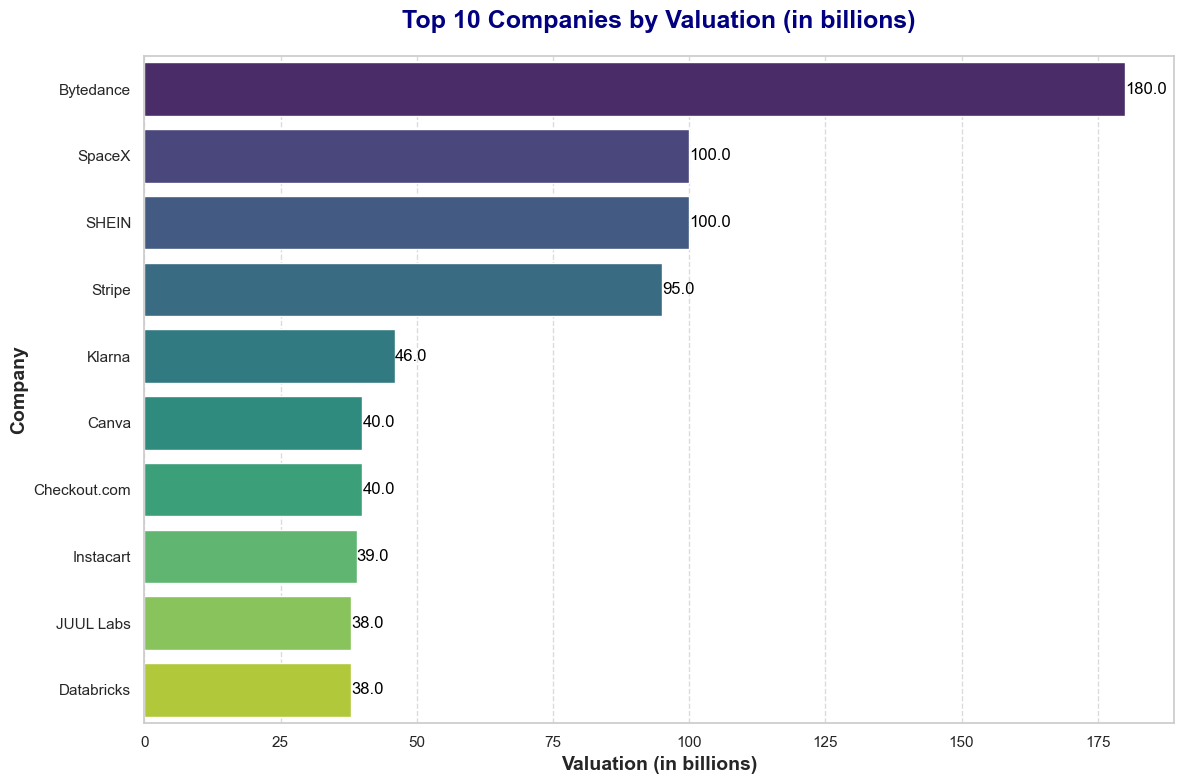

In [131]:
plt.figure(figsize=(12, 8))


bar_plot = sns.barplot(x='valuation in billions', y='Company', data=top10_company, palette='viridis')


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.1f}',  
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', fontsize=12, color='black')


plt.title("Top 10 Companies by Valuation (in billions)", fontsize=18, weight='bold', color='navy', pad=20)
plt.xlabel("Valuation (in billions)", fontsize=14, weight='bold')
plt.ylabel("Company", fontsize=14, weight='bold')


plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

INSIGHTS:Top 10 Companies which have highest valuation

# 7)Industry wise Distribution of Valuation?

In [36]:
valuation_by_industry = df.groupby(df['Industry'])['valuation in billions'].sum().reset_index()
valuation_by_industry

,Industry,valuation in billions
0,Artificial intelligence,377.0
1,Auto & transportation,99.0
2,Consumer & retail,106.0
3,Cybersecurity,129.0
4,Data management & analytics,136.0
5,E-commerce & direct-to-consumer,426.0
6,Edtech,100.0
7,Fintech,882.0
8,Hardware,99.0
9,Health,198.0


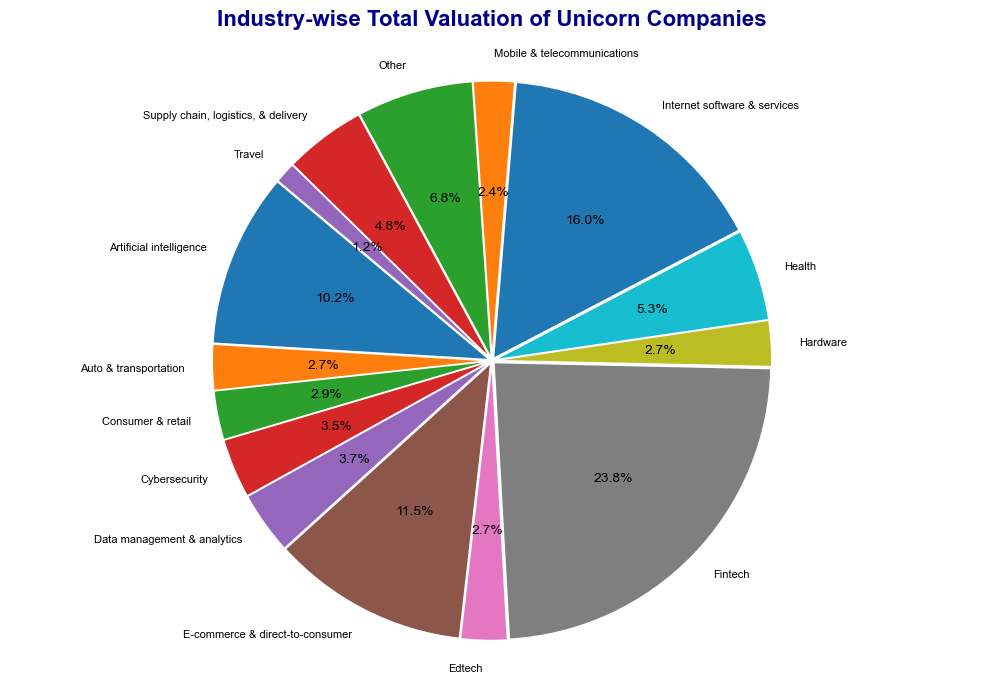

In [132]:
plt.figure(figsize=(10, 7))


colors = plt.cm.tab10.colors  


wedges, texts, autotexts = plt.pie(
    valuation_by_industry['valuation in billions'],
    labels=valuation_by_industry['Industry'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.01] * len(valuation_by_industry),  
)


for text in texts:
    text.set_fontsize(8)
    text.set_color('black')

for autotext in autotexts:
    autotext.set_color('black')  
    autotext.set_fontsize(10)  


plt.title("Industry-wise Total Valuation of Unicorn Companies", fontsize=16, weight='bold', color='darkblue', pad=20)
plt.axis('equal')  
plt.tight_layout()  
plt.show()

INSIGHTS: WHICH INDUSTRY CONTRIBUTES MORE IN TERMS OF VALUATION

# 8)Top 10 companies which taken less time to become unicorn?

In [54]:
top10_fastest_unicorn=df[['Company','Years taken']]
top10_fastest_unicorn.sort_values(by='Years taken',ascending=True).head(10)

,Company,Years taken
967,Mensa Brands,0
396,candy.com,0
775,Jokr,0
554,ClickHouse,0
161,Ola Electric Mobility,0
822,GlobalBees,0
314,Flink Food,0
1001,Playco,0
546,Avant,0
151,Cerebral,1


INSIGHTS: These  top 10 companies took less time to become unincorn

# 9)Top 10 Continent By Mean Valuation?

In [81]:
avg_value_continent=df.groupby(df['Country/Region'])['valuation in billions'].mean().round(2).reset_index()
top_10_continent_val=avg_value_continent.sort_values(by='valuation in billions',ascending=False).head(10)
top_10_continent_val

,Country/Region,valuation in billions
3,Bahamas,32.00
38,Sweden,10.50
1,Australia,7.00
14,Estonia,6.50
41,Turkey,5.33
25,Lithuania,5.00
20,Indonesia,4.67
43,United Kingdom,4.53
9,China,4.04
13,Denmark,3.50


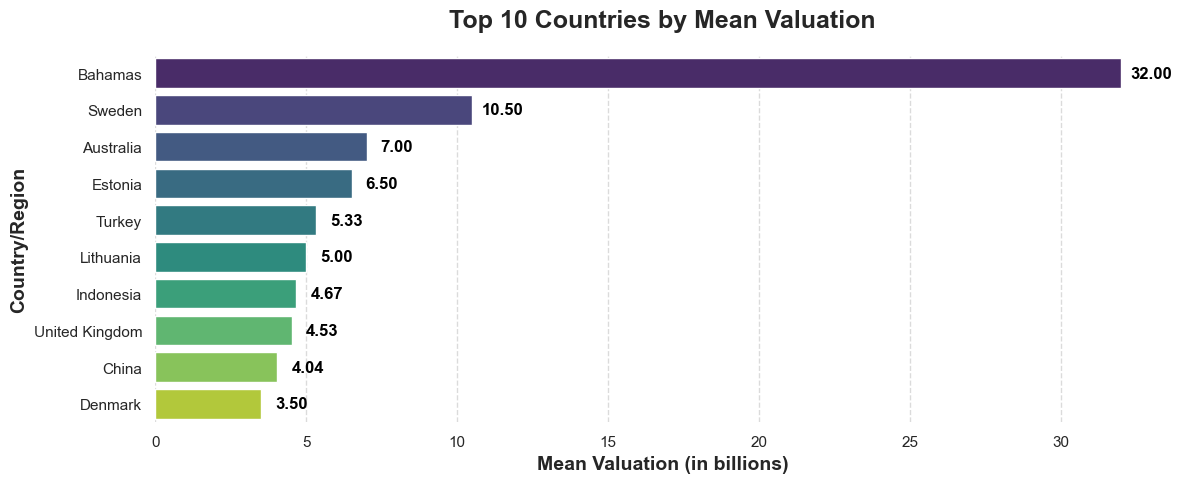

In [133]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 5))

bar_plot = sns.barplot(
    x='valuation in billions', 
    y='Country/Region', 
    data=top_10_continent_val, 
    palette='viridis'  
)

plt.title('Top 10 Countries by Mean Valuation', fontsize=18, weight='bold', pad=20)
plt.xlabel('Mean Valuation (in billions)', fontsize=14, weight='bold')
plt.ylabel('Country/Region', fontsize=14, weight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)

for p in bar_plot.patches:
    plt.annotate(f"{p.get_width():,.2f}",   
                 (p.get_width()+1 , p.get_y() + p.get_height() / 2), 
                 ha='center', va='center', fontsize=12,color='black', fontweight='bold')


sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

INSIGHTS:This analysis can reveal which regions are leading in terms of startup success, helping investors focus on geographic areas with high growth potential.

# 10)Which Cities Are Producing More Unicorns?

In [100]:
unicorn_count_city=df.groupby(df['City'])['Company'].count().reset_index()
top_10_city=unicorn_count_city.sort_values(by='Company',ascending=False).head(10)
top_10_city

,City,Company
200,San Francisco,152
162,New York,103
14,Beijing,62
215,Shanghai,44
131,London,34
18,Bengaluru,29
174,Paris,19
216,Shenzhen,19
172,Palo Alto,18
21,Berlin,17


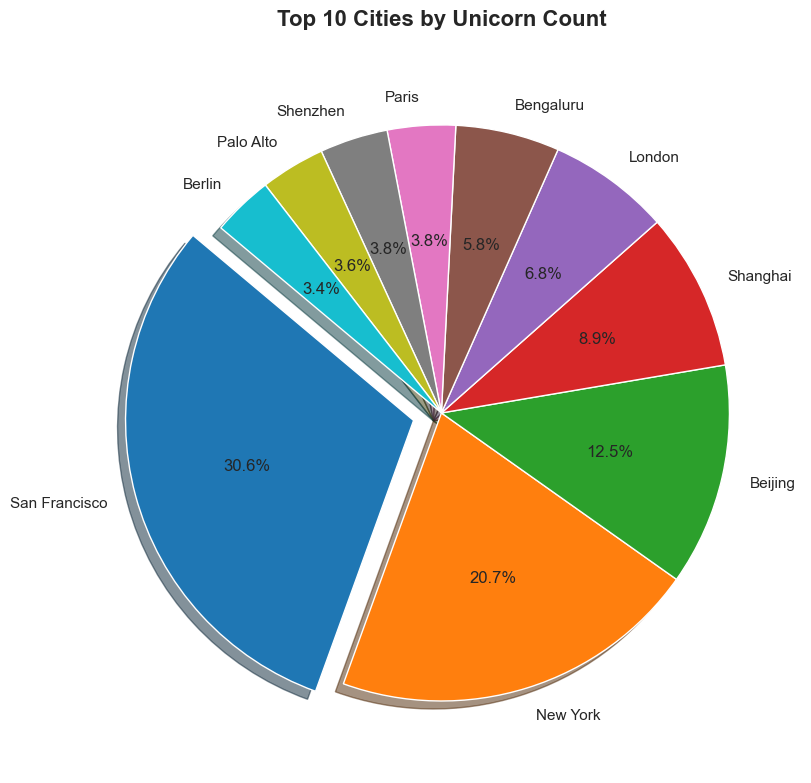

In [134]:
plt.figure(figsize=(10, 8))

colors = sns.color_palette('tab10', len(top_10_city))  
explode = [0.1 if i == 0 else 0 for i in range(len(top_10_city))]  


plt.pie(
    top_10_city['Company'],           
    labels=top_10_city['City'],         
    autopct='%1.1f%%',                  
    startangle=140,                     
    colors=colors,                     
    explode=explode,                    
    shadow=True,
    wedgeprops={'edgecolor': 'white'}   
)

plt.title('Top 10 Cities by Unicorn Count', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Insight:Understanding the most successful startup cities can guide investors in focusing on regions with strong entrepreneurial ecosystems.